In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
from sklearn.preprocessing import LabelEncoder
Lb_gender = LabelEncoder()
data.iloc[:,0] = Lb_gender.fit_transform(data.iloc[:,0])
data.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [4]:
Lb_gender.classes_

array(['Female', 'Male'], dtype=object)

In [15]:
corr = data.iloc[:,:-1].corr()
print('Since the correlation is not high no need to exclude any columns')
corr

Since the correlation is not high no need to exclude any columns


,Gender,Age,Salary
Gender,1.000000,-0.073741,-0.060435
Age,-0.073741,1.000000,0.155238
Salary,-0.060435,0.155238,1.000000


In [6]:
from sklearn.model_selection import KFold
kf_cv = KFold(n_splits = 5,random_state=5,shuffle=True)
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


Logistic Regression
There are 80 values out of 80 between range of 0.4 and 0.6

Accuracy for logistic regression is:  66.25
F1 score for logistic regression is:  0.0
Confusion Matrix: 


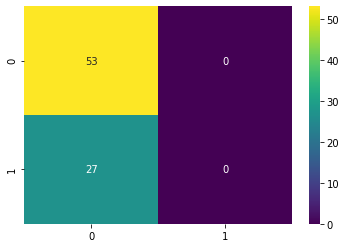

In [19]:
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
maxx = []
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    logistic.fit(xtr,ytr)
    logistic_pred = logistic.predict(xte)
    logistic_matrix = confusion_matrix(yte,logistic_pred)
    maxx.append(100*(logistic_matrix[0][0]+logistic_matrix[1][1])/np.sum(logistic_matrix))
#print(maxx.index(max(maxx)))
#print(maxx)
i=0
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    logistic.fit(xtr,ytr)
    if(i==maxx.index(max(maxx))):
        break
    i=i+1

logistic_pred = logistic.predict(xte)
logistic_prob = logistic.predict_proba(xte)
#print(logistic.predict_proba(xte))
k = logistic_prob[:,0]
a = np.where(np.logical_and(0.4<k,k<0.6))
print("There are %d values out of %d between range of 0.4 and 0.6\n"%(np.shape(a)[1],np.shape(yte)[0]))

logistic_pred
logistic_matrix = confusion_matrix(yte,logistic_pred)

seaborn.heatmap(logistic_matrix,annot = True,cmap='viridis')

f1_logistic = f1_score(yte,logistic_pred)
print("Accuracy for logistic regression is: ",100*(logistic_matrix[0][0]+logistic_matrix[1][1])/np.sum(logistic_matrix))
print("F1 score for logistic regression is: ",f1_logistic)
print("Confusion Matrix: ")



For Decision Tree
There are 0 values out of 80 between range of 0.4 and 0.6

Accuracy for Decision tree Classifier is:  87.5
F1 Score For Decision tree Classifier is : 0.8214285714285715
Confusion Matrix: 


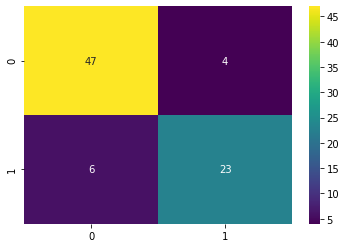

In [20]:
print("For Decision Tree")
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
maxx = []
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    decision.fit(xtr,ytr)
    decision_pred = decision.predict(xte)
    decision_matrix = confusion_matrix(yte,decision_pred)
    maxx.append(100*(decision_matrix[0][0]+decision_matrix[1][1])/np.sum(decision_matrix))
#print(maxx.index(max(maxx)))
#print(maxx)
i=0
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    decision.fit(xtr,ytr)
    if(i==maxx.index(max(maxx))):
        break
    i=i+1
decision_pred = decision.predict(xte)
decision_matrix = confusion_matrix(yte,decision_pred)

decision_prob = decision.predict_proba(xte)
#print(decision.predict_proba(xte))
k = decision_prob[:,0]
a = np.where(np.logical_and(0.4<k,k<0.6))
print("There are %d values out of %d between range of 0.4 and 0.6\n"%(np.shape(a)[1],np.shape(yte)[0]))

seaborn.heatmap(decision_matrix,annot = True,cmap='viridis')

f1_decision = f1_score(yte,decision_pred)
print("Accuracy for Decision tree Classifier is: ",100*(decision_matrix[0][0]+decision_matrix[1][1])/np.sum(decision_matrix))
print('F1 Score For Decision tree Classifier is :',f1_decision)
print("Confusion Matrix: ")

For Random Forest
There are 2 values out of 80 between range of 0.4 and 0.6

Accuracy for Random Forest Classifier is:  92.5
F1 Score For Random Forest Classifier is : 0.9
Confusion Matrix: 


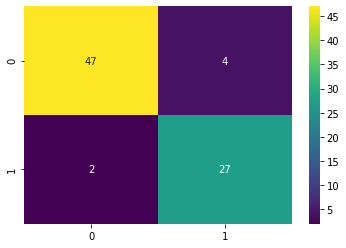

In [17]:
print("For Random Forest")
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
maxx = []
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    random.fit(xtr,ytr)
    random_pred = random.predict(xte)
    random_matrix = confusion_matrix(yte,random_pred)
    maxx.append(100*(random_matrix[0][0]+random_matrix[1][1])/np.sum(random_matrix))
#print(maxx.index(max(maxx)))
#print(maxx)
i=0
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    random.fit(xtr,ytr)
    if(i==maxx.index(max(maxx))):
        break
    i=i+1
random_pred = random.predict(xte)

random_prob = random.predict_proba(xte)
#print(random.predict_proba(xte))
k = random_prob[:,0]
a = np.where(np.logical_and(0.4<k,k<0.6))
print("There are %d values out of %d between range of 0.4 and 0.6\n"%(np.shape(a)[1],np.shape(yte)[0]))

random_matrix = confusion_matrix(yte,random_pred)
seaborn.heatmap(random_matrix,annot = True,cmap='viridis')


f1_random = f1_score(yte,random_pred)
f1_random
print("Accuracy for Random Forest Classifier is: ",100*(random_matrix[0][0]+random_matrix[1][1])/np.sum(random_matrix))
print('F1 Score For Random Forest Classifier is :',f1_random)
print("Confusion Matrix: ")

For Naive Bayes
There are 7 values out of 80 between range of 0.4 and 0.6

Accuracy for Naive bayes Classifier is:  90.0
F1 Score For Naive bayes Classififer is : 0.8461538461538461
Confusion Matrix: 


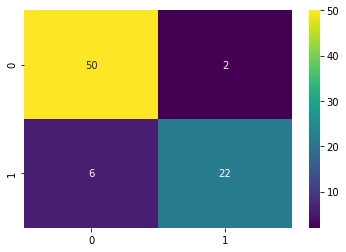

In [10]:
print("For Naive Bayes")
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
maxx = []
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    naive.fit(xtr,ytr)
    naive_pred = naive.predict(xte)
    naive_matrix = confusion_matrix(yte,naive_pred)
    maxx.append(100*(naive_matrix[0][0]+naive_matrix[1][1])/np.sum(naive_matrix))
#print(maxx.index(max(maxx)))
#print(maxx)
i=0
for train,test in kf_cv.split(data):
    xtr ,xte, ytr ,yte = X[train],X[test],Y[train],Y[test]
    naive.fit(xtr,ytr)
    if(i==maxx.index(max(maxx))):
        break
    i=i+1

naive_pred = naive.predict(xte)

naive_prob = np.array(np.round(naive.predict_proba(xte),2))
#print(naive_prob)
k=naive_prob[:,0]
a=np.where(np.logical_and(0.4<k,k<0.6))
print("There are %d values out of %d between range of 0.4 and 0.6\n"%(np.shape(a)[1],np.shape(yte)[0]))
naive_matrix = confusion_matrix(yte,naive_pred)
seaborn.heatmap(naive_matrix,annot = True,cmap='viridis')

f1_naive = f1_score(yte,naive_pred)
print("Accuracy for Naive bayes Classifier is: ",100*(naive_matrix[0][0]+naive_matrix[1][1])/np.sum(naive_matrix))
print('F1 Score For Naive bayes Classififer is :',f1_naive)
print("Confusion Matrix: ")